In [8]:
import tensorflow as tf 
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Rescaling
import numpy as np

# already have split data into directories 
# add the paths 
train_data_dir = "data/train/"
test_data_dir = "data/test/"
val_data_dir = "data/val/"

batch_size = 32
img_height = 150
img_width = 150

# rescale instance
rescale = Rescaling(scale=1.0/255)

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)
rescale = Rescaling(scale=1.0/255)
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_data_dir,
    seed=123,
    image_size=(img_height, img_width), batch_size=batch_size
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

Found 624 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [9]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Train batch shape:", images.shape)  # Shape: (batch_size, height, width, channels)
    print("Train labels shape:", labels.shape)  # Shape: (batch_size,)


Train batch shape: (32, 150, 150, 3)
Train labels shape: (32,)


2025-05-03 16:29:00.350058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
for images, labels in test_ds.take(1):
    print("Test batch shape:", images.shape)
    print("Test labels shape:", labels.shape)


Test batch shape: (32, 150, 150, 3)
Test labels shape: (32,)


2025-05-03 16:29:00.450888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Label for each of the above images: [1 1 1 1 1]


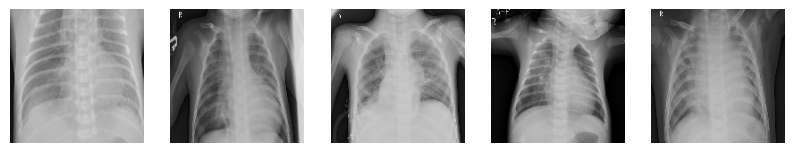

In [11]:
import matplotlib.pyplot as plt

# Get one batch of images and labels from the rescaled dataset
for images, labels in train_rescale_ds.take(1):  
    X_train_batch = images.numpy()  # Convert to NumPy array
    y_train_batch = labels.numpy()  # Convert labels to NumPy
    break

# Plot the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_batch[i])  # No need for uint8 conversion since values are [0,1]
    plt.axis("off")

print('Label for each of the above images:', y_train_batch[:5])

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

input_shape=(150, 150, 3)
num_classes = 2

model = keras.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Rescaling(1./255),
       
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
       
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Print model summary
model.summary()


/Users/oviya/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(
    train_rescale_ds,
    validation_data=val_rescale_ds,
    epochs=20,  # Can be adjusted
    batch_size=32,
    verbose=1
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 357ms/step - accuracy: 0.7349 - loss: 0.5891 - val_accuracy: 0.5000 - val_loss: 0.7433
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 340ms/step - accuracy: 0.7489 - loss: 0.5743 - val_accuracy: 0.5000 - val_loss: 0.7704
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 350ms/step - accuracy: 0.7465 - loss: 0.5736 - val_accuracy: 0.5000 - val_loss: 0.8482
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 352ms/step - accuracy: 0.7446 - loss: 0.5733 - val_accuracy: 0.5000 - val_loss: 0.8079
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 384ms/step - accuracy: 0.7504 - loss: 0.5686 - val_accuracy: 0.5000 - val_loss: 0.8487
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 368ms/step - accuracy: 0.7493 - loss: 0.5717 - val_accuracy: 0.5000 - val_loss: 0.8725
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.7469 - loss: 0.5701 - val_accuracy: 0.5000 - val_loss: 0.8571
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 349ms/step - accuracy: 0.7468 - loss: 0

In [14]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_rescale_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6251 - loss: 0.7148
Test Loss: 0.7149
Test Accuracy: 0.625


In [15]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [16]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    
    # Tune the number of Conv2D layers and filters
    for i in range(hp.Int('conv_blocks', 1, 3)):
        filters = hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32)
        model.add(layers.Conv2D(filters, (3,3), activation='relu'))
        model.add(layers.MaxPooling2D())
    
    model.add(layers.Flatten())
    
    # Tune number of units in dense layer
    hp_units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Tune dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))
    
    model.add(layers.Dense(2, activation='softmax'))
    
    # Tune optimizer
    hp_learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [17]:
#evaluation metrics function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    
    for images, labels in dataset:
        y_true.extend(labels.numpy())
        preds = model.predict(images, verbose=0)
        y_pred.extend(np.argmax(preds, axis=1))
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate all metrics
    report = classification_report(y_true, y_pred, output_dict=True, target_names=['Class 0', 'Class 1'])
    
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score'],
        'class_0_precision': report['Class 0']['precision'],
        'class_1_precision': report['Class 1']['precision'],
        'class_0_recall': report['Class 0']['recall'],
        'class_1_recall': report['Class 1']['recall']
    }

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def run_tuning(tuner_type):
    if tuner_type == "hyperband":
        tuner = kt.Hyperband(
            model_builder,
            objective='val_accuracy',
            max_epochs=10,
            factor=3,
            directory='tuning',
            project_name=f'pneumonia_{tuner_type}'
        )
    elif tuner_type == "bayesian":
        tuner = kt.BayesianOptimization(
            model_builder,
            objective='val_accuracy',
            max_trials=15,
            directory='tuning',
            project_name=f'pneumonia_{tuner_type}'
        )
    else:  # random
        tuner = kt.RandomSearch(
            model_builder,
            objective='val_accuracy',
            max_trials=15,
            directory='tuning',
            project_name=f'pneumonia_{tuner_type}'
        )
    
    # Track metrics during tuning
    tuner.search(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
    )
    
    # Get best model and retrain
    best_hps = tuner.get_best_hyperparameters()[0]
    model = model_builder(best_hps)
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=20,
        verbose=0
    )
    
    # Evaluate
    metrics = evaluate_model(model, val_ds)
    return metrics, history, best_hps

Trial 30 Complete [00h 14m 19s]
val_accuracy: 0.9375

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 42m 31s

Best hyperparameters:
- Conv blocks: 1
- Filters (first block): 128
- Dense units: 64
- Dropout: 0.2
- Optimizer: adam
- Learning rate: 0.0001



In [ ]:
# Run tuning for each method
print("Running Hyperband tuning...")
hyperband_metrics, hyperband_history, hyperband_hps = run_tuning("hyperband")

print("Running Bayesian tuning...")
bayesian_metrics, bayesian_history, bayesian_hps = run_tuning("bayesian")

print("Running Random Search tuning...")
random_metrics, random_history, random_hps = run_tuning("random")

In [ ]:
# figures
def plot_metric_comparison():
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        values = [
            hyperband_metrics[metric],
            bayesian_metrics[metric],
            random_metrics[metric]
        ]
        bars = plt.bar(['Hyperband', 'Bayesian', 'Random'], values, color=colors[i])
        plt.title(f'{metric.capitalize()} Comparison')
        plt.ylim(0, 1)
        
        # Add values on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('metric_comparison.png')
    plt.show()

plot_metric_comparison()

In [ ]:
def plot_class_metrics():
    plt.figure(figsize=(12, 6))
    
    # Precision Comparison
    plt.subplot(1, 2, 1)
    x = np.arange(2)
    width = 0.25
    plt.bar(x - width, [hyperband_metrics['class_0_precision'], hyperband_metrics['class_1_precision']], 
            width, label='Hyperband')
    plt.bar(x, [bayesian_metrics['class_0_precision'], bayesian_metrics['class_1_precision']], 
            width, label='Bayesian')
    plt.bar(x + width, [random_metrics['class_0_precision'], random_metrics['class_1_precision']], 
            width, label='Random')
    plt.xticks(x, ['Class 0', 'Class 1'])
    plt.title('Class-wise Precision')
    plt.legend()
    
    # Recall Comparison
    plt.subplot(1, 2, 2)
    plt.bar(x - width, [hyperband_metrics['class_0_recall'], hyperband_metrics['class_1_recall']], 
            width, label='Hyperband')
    plt.bar(x, [bayesian_metrics['class_0_recall'], bayesian_metrics['class_1_recall']], 
            width, label='Bayesian')
    plt.bar(x + width, [random_metrics['class_0_recall'], random_metrics['class_1_recall']], 
            width, label='Random')
    plt.xticks(x, ['Class 0', 'Class 1'])
    plt.title('Class-wise Recall')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('class_metrics.png')
    plt.show()

plot_class_metrics()


In [ ]:
def plot_training_histories():
    plt.figure(figsize=(15, 5))
    
    # Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(hyperband_history.history['accuracy'], label='Hyperband Train')
    plt.plot(hyperband_history.history['val_accuracy'], label='Hyperband Val')
    plt.plot(bayesian_history.history['accuracy'], label='Bayesian Train')
    plt.plot(bayesian_history.history['val_accuracy'], label='Bayesian Val')
    plt.plot(random_history.history['accuracy'], label='Random Train')
    plt.plot(random_history.history['val_accuracy'], label='Random Val')
    plt.title('Accuracy')
    plt.legend()
    
    # Precision
    plt.subplot(1, 3, 2)
    plt.plot(hyperband_history.history['precision'], label='Hyperband Train')
    plt.plot(hyperband_history.history['val_precision'], label='Hyperband Val')
    plt.plot(bayesian_history.history['precision'], label='Bayesian Train')
    plt.plot(bayesian_history.history['val_precision'], label='Bayesian Val')
    plt.plot(random_history.history['precision'], label='Random Train')
    plt.plot(random_history.history['val_precision'], label='Random Val')
    plt.title('Precision')
    plt.legend()
    
    # Recall
    plt.subplot(1, 3, 3)
    plt.plot(hyperband_history.history['recall'], label='Hyperband Train')
    plt.plot(hyperband_history.history['val_recall'], label='Hyperband Val')
    plt.plot(bayesian_history.history['recall'], label='Bayesian Train')
    plt.plot(bayesian_history.history['val_recall'], label='Bayesian Val')
    plt.plot(random_history.history['recall'], label='Random Train')
    plt.plot(random_history.history['val_recall'], label='Random Val')
    plt.title('Recall')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

plot_training_histories()

In [ ]:
import pandas as pd
# Create a DataFrame to compare metrics
results = pd.DataFrame({
    'Hyperband': hyperband_metrics,
    'Bayesian': bayesian_metrics,
    'Random': random_metrics
}).T

best_method = results['f1'].idxmax()
best_hps = {
    'hyperband': hyperband_hps,
    'bayesian': bayesian_hps,
    'random': random_hps
}[best_method]

print(f"\nBest Tuning Method: {best_method}")
print("\n=== Best Hyperparameters ===")
for param, value in best_hps.values.items():
    print(f"{param:>20}: {value}")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#save the best model
all_models = {
    'hyperband': hyperband_metrics,
    'bayesian': bayesian_metrics,
    'random': random_metrics
}
best_method = max(all_models.keys(), key=lambda k: all_models[k]['recall'])
best_hps = {
    'hyperband': hyperband_hps,
    'bayesian': bayesian_hps,
    'random': random_hps
}[best_method]

final_model = model_builder(best_hps)
final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[
        ModelCheckpoint(
            './models/best_pneumonia_model.keras',
            monitor='val_recall',
            save_best_only=True,
            mode='max'
        )
    ]
)